## Step 1: Import necessary libraries
In the first cell, we need to import the libraries that we will use for numerical calculations and plotting.

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Define problem parameters
In the second cell, we define all the parameters for the aquifer system such as length, distance between nodes, transmissivity, and discharge. We also calculate the number of nodes and initialize the head vector.

In [6]:
# Define problem parameters

# Given parameters
L = 5000              # Length of domain (meters)
delx = 1250           # Distance between nodes (meters)
T = 500               # Transmissivity
Q = 0.0005            # Discharge (m/d)

# Number of nodes
n_nodes = int(L / delx) + 1

# Initialize the head vector (starting with zeros)
h = np.zeros(n_nodes)


## Step 3: Construct the coefficient matrix (tridiagonal system)
In this step, we construct the coefficient matrix A for the finite difference method. This matrix will represent the system of equations that we need to solve.

In [10]:
# Construct the coefficient matrix (tridiagonal system)

# Create a square matrix A of size n_nodes x n_nodes, filled with zeros
A = np.zeros((n_nodes, n_nodes))

# Fill the matrix A for interior nodes
for i in range(1, n_nodes - 1):  # Start from node 1 to n-2 for interior nodes
    A[i, i-1] = 1  # Coefficient for h[i-1]
    A[i, i] = -2   # Coefficient for h[i]
    A[i, i+1] = 1  # Coefficient for h[i+1]

# Boundary conditions for the first and last rows
A[0, 0] = 1
A[-1, -1] = 1


## Step 4: Define the right-hand side vector
Next, we define the right-hand side vector b. This vector represents the source term in the finite difference equation. We will use the provided discharge Q, transmissivity T, and the distance between nodes delx to populate the right-hand side for interior nodes. Boundary conditions are added as well.

In [13]:
# Define the right-hand side vector

# Initialize the right-hand side vector b
b = np.zeros(n_nodes)

# Set the right-hand side vector for the interior points (using -delx^2 * Q / T)
for i in range(1, n_nodes - 1):
    b[i] = -(delx**2 * Q) / T

# Boundary conditions for the first and last points
b[0] = 112.5 # Boundary condition at x=0
b[-1] = 100  # Boundary condition at x=L


## Step 5: Solve the linear system
Now, we use the np.linalg.solve() function to solve the system of linear equations A * h = b for the head distribution h.

In [16]:
# Solve the linear system

# Use numpy's linear algebra solver to find the head distribution h
h = np.linalg.solve(A, b)


## Step 6: Plot the results
Finally, we plot the head distribution h against the distance x using matplotlib. We also remove the top and right axes for a cleaner plot and optionally add a scatter plot at the average head between the boundary points.

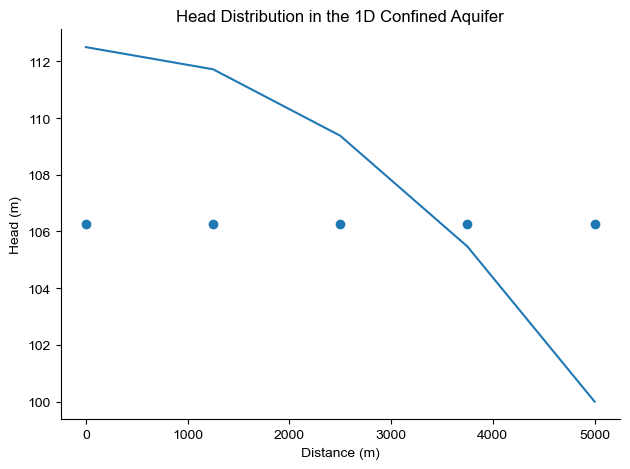

In [21]:
# Plot the results

# Create the x values for plotting (distance along the aquifer)
x = np.linspace(0, L, n_nodes)

# Plot the head distribution
plt.figure()
plt.rcParams['font.family'] = 'Arial'
plt.plot(x, h)
plt.xlabel('Distance (m)')
plt.ylabel('Head (m)')
plt.title('Head Distribution in the 1D Confined Aquifer')

# Remove the top and right spines for a cleaner plot
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optionally, add a scatter plot of average head between boundary points
plt.scatter(x, [(h[0] + h[-1]) * 0.5] * len(x))

# Adjust layout for a tight fit
plt.tight_layout()

# Show the plot
plt.show()
